# Individual Prediction

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Load Previous Trained Model

In [2]:
from tensorflow.keras.models import load_model

model = load_model('../2_Modeling_Phase/Saved-Models/Farm-Flow_DNN-Deep-Neural-Network_Model.h5')

2024-03-12 12:43:00.333500: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 12:43:00.452176: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 12:43:00.452213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 12:43:00.469749: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 12:43:00.506630: I tensorflow/core/platform/cpu_feature_guar

Load Train Dataset

In [3]:
df_train = pd.read_csv("../0_Datasets/Farm-Flow/train.csv")

Load Test Dataset

In [4]:
df_test = pd.read_csv("../0_Datasets/Farm-Flow/test.csv")

In [5]:
display(df_train)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.236304     -0.662387          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.662387          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.672105     -0.457813          -0.577140          -0.443123   
...             ...           ...                ...                ...   
47341     -0.454205     -0.457813          -0.577140          -0.443123   
47342     -0.454205     -0.662387          -0.577140          -0.443123   
47343      2.160596      1.997080           2.285759           2.444445   
47344      1.288996      1.383357           1.713179           0.711904   
47345     -0.672105     -0.457813          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.277741         -0.268577          -0.273647      -1.394192   
1              0.490111          0.504662           0.498222       0.728588   
2             -0.277918         -0.268577          -0.273736      -1.394192   
3             -0.276874         -0.267504          -0.272675       0.728588   
4             -0.277823         -0.268460          -0.273629       0.728588   
...                 ...               ...                ...            ...   
47341         -0.276776         -0.267991          -0.272869      -0.332802   
47342         -0.277509         -0.268577          -0.273530      -1.394192   
47343         -0.276943         -0.267646          -0.272781       0.576960   
47344         -0.265775         -0.256330          -0.261520       0.728588   
47345         -0.277865         -0.268501          -0.273671       0.728588   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.643844            -1.423582  ...              -0.562720   
1                -0.643844             0.278456  ...              -0.562720   
2                -0.724235            -1.423582  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.684039            -0.147053  ...              -0.562720   
...                    ...                  ...  ...                    ...   
47341            -0.483062            -0.147053  ...              -0.562720   
47342            -0.724235            -1.423582  ...              -0.562720   
47343             1.928668            -0.147053  ...              -0.240860   
47344             2.330623             1.129475  ...              -0.250326   
47345            -0.684039            -0.147053  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.744570              -0.562649              -0.557806   
...                      ...                    ...                    ...   
47341              -0.744570              -0.562649              -0.557806   
47342              -0.744570              -0.562649              -0.557806   
47343               1.678331              -0.054762              -0.267306   
47344               0.400251              -0.238680              -0.346375   
47345              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.638986          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.556874         -0.638986          -0.741186   
3              

In [6]:
display(df_test)

fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  \
0         -0.672105     -0.457813          -0.577140          -0.443123   
1         -0.672105     -0.457813          -0.577140          -0.443123   
2         -0.454205     -0.457813          -0.577140          -0.443123   
3          2.378496      2.406229           2.285759           2.444445   
4         -0.454205     -0.253238          -0.004560          -0.443123   
...             ...           ...                ...                ...   
15778      1.942696      2.201655           2.285759           2.444445   
15779      2.160596      2.201655           2.285759           2.444445   
15780     -0.236304     -0.662387          -0.577140          -0.443123   
15781     -0.454205     -0.662387          -0.577140          -0.443123   
15782     -0.236304     -0.662387          -0.577140          -0.443123   

       fwd_pkts_per_sec  bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  \
0             -0.276940         -0.267571          -0.272742       0.728588   
1             -0.277181         -0.267813          -0.272983       0.728588   
2             -0.276909         -0.268058          -0.272969      -0.332802   
3             -0.276907         -0.267537          -0.272708       0.728588   
4             -0.276892         -0.267522          -0.272693       0.728588   
...                 ...               ...                ...            ...   
15778         -0.277003         -0.267561          -0.272768       0.891878   
15779         -0.276991         -0.267622          -0.272793       0.728588   
15780         -0.277906         -0.268577          -0.273730      -1.394192   
15781         -0.277687         -0.268577          -0.273620      -1.394192   
15782         -0.277882         -0.268577          -0.273718      -1.394192   

       fwd_header_size_tot  fwd_header_size_min  ...  flow_pkts_payload.max  \
0                -0.684039            -0.147053  ...              -0.562720   
1                -0.684039            -0.147053  ...              -0.562720   
2                -0.483062            -0.147053  ...              -0.562720   
3                 2.129645            -0.147053  ...              -0.240860   
4                -0.241889             1.129475  ...              -0.477522   
...                    ...                  ...  ...                    ...   
15778             1.727690            -0.147053  ...              -0.240860   
15779             1.928668            -0.147053  ...              -0.240860   
15780            -0.643844            -1.423582  ...              -0.562720   
15781            -0.724235            -1.423582  ...              -0.562720   
15782            -0.643844            -1.423582  ...              -0.562720   

       flow_pkts_payload.tot  flow_pkts_payload.avg  flow_pkts_payload.std  \
0                  -0.744570              -0.562649              -0.557806   
1                  -0.744570              -0.562649              -0.557806   
2                  -0.744570              -0.562649              -0.557806   
3                   1.678331              -0.105550              -0.268638   
4                  -0.635539              -0.408378              -0.455263   
...                      ...                    ...                    ...   
15778               1.678331              -0.054762              -0.267306   
15779               1.678331              -0.072901              -0.267431   
15780              -0.744570              -0.562649              -0.557806   
15781              -0.744570              -0.562649              -0.557806   
15782              -0.744570              -0.562649              -0.557806   

       fwd_subflow_pkts  bwd_subflow_pkts  fwd_subflow_bytes  \
0             -0.556874         -0.419418          -0.741186   
1             -0.556874         -0.419418          -0.741186   
2             -0.329944         -0.419418          -0.741186   
3              

-----
## Train and Test Datasets

Drop Multiclass Column

In [7]:
df_train = df_train.drop('traffic', axis=1)
df_test = df_test.drop('traffic', axis=1)

Excluding the target variable

In [8]:
X_columns = df_train.columns.drop('is_attack')

Create a feature matrix X by selecting only the columns specified in X_columns. Then convert the selected data into a NumPy array.

In [9]:
X = df_train[X_columns].values

Creates a target variable y containing the target variable

In [10]:
y = df_train["is_attack"].values

Split into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Get Features Names and Class Names

In [12]:
feature_names = list(X_columns)
class_names = ["Normal", "Malicious"]
response_dict = {0: 'Normal', 1: 'Malicious'}

Generate Prediction

In [13]:
pred = model.predict(X_test)

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step


Labeled Df's

In [14]:
X_test_labeled = pd.DataFrame(X_test, columns=feature_names)
X_train_labeled = pd.DataFrame(X_train, columns=feature_names)

# Since both are one-dimensional NumPy arrays
pred_series = pd.Series(pred.flatten())
y_test_target_series = pd.Series(y_test)
y_train_target_series = pd.Series(y_train)

Create a subset of the Train DF for faster training

In [15]:
subset_percentage = 0.1
X_subset, _, y_subset, _ = train_test_split(X_train, y_train, test_size=1 - subset_percentage, stratify=y_train)

In [16]:
subset_percentage = 0.1
X_subset_labeled, _, y_subset_labeled, _ = train_test_split(X_train_labeled, y_train_target_series, test_size=1 - subset_percentage, stratify=y_train_target_series)

In [17]:
subset_percentage = 0.1
X_test_subset_labeled, _, y_test_subset_labeled, _ = train_test_split(X_test_labeled, y_test_target_series, test_size=1 - subset_percentage, stratify=y_test_target_series)

Row to explain

In [18]:
idx = 0

---

## Anchor - Doesn't work with DNN

## Dalex - Doesn't work with DNN

## LIME

In [23]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_test_labeled.values, feature_names=feature_names, class_names=["Normal", "Malicious"])

# Explain the prediction for a specific instance
instance_to_explain = X_test_labeled.values[idx]
predicted_probabilities = model.predict(instance_to_explain.reshape(1, -1))
predicted_class = np.argmax(predicted_probabilities)
explanation = explainer.explain_instance(instance_to_explain, model.predict, num_features=len(feature_names), top_labels=1, labels=[predicted_class])

print(f"Predicted Class: {class_names[predicted_class]}")
print(f"True Class: {y_test_target_series[idx]}")
print(f"Lime Prediction: {explanation.predict_proba[0]}")

explanation.show_in_notebook()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step
Predicted Class: Normal
True Class: 1
Lime Prediction: 0.9997262358665466



                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    


## SHAP

In [24]:
import shap
shap.initjs()

explainer = shap.Explainer(model, X_test, feature_names=feature_names)

shap_values = explainer.shap_values(X_test[idx:idx+1])

370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
Predicted: [0.99972624]


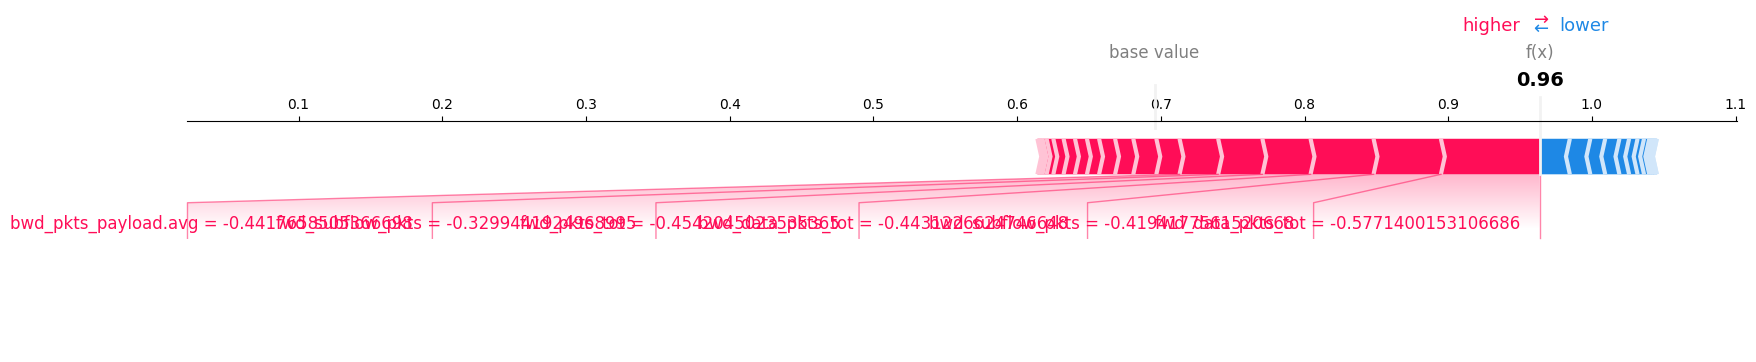

In [25]:
prediction = model.predict(X_test)

print(f"Predicted: {prediction[idx]}")

baseline_value = np.mean(prediction)

shap.force_plot(
    baseline_value,
    shap_values[idx],
    X_test[idx],
    feature_names=feature_names,
    matplotlib=True
)

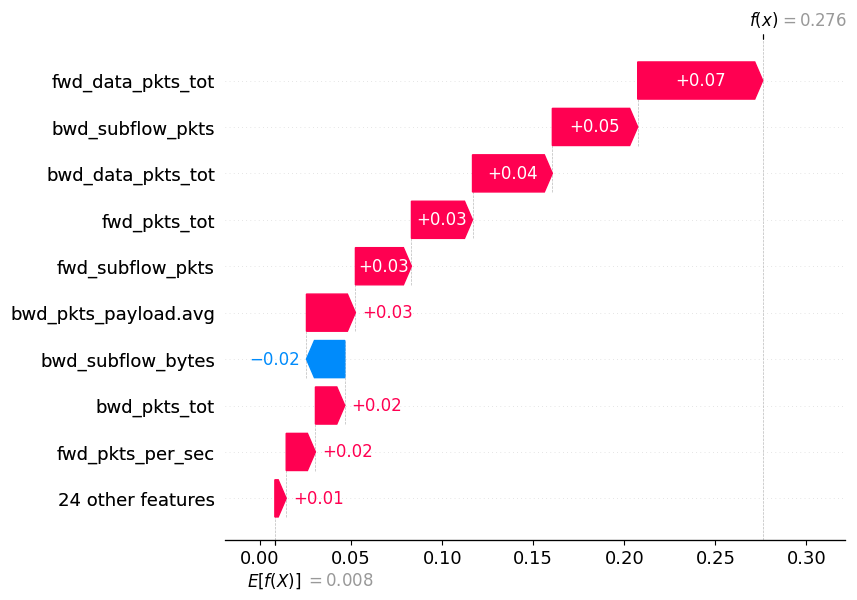

In [26]:
expected_value = np.mean(shap_values)

explanation = shap.Explanation(values=shap_values[0], base_values=expected_value, feature_names=feature_names)

shap.plots.waterfall(explanation)

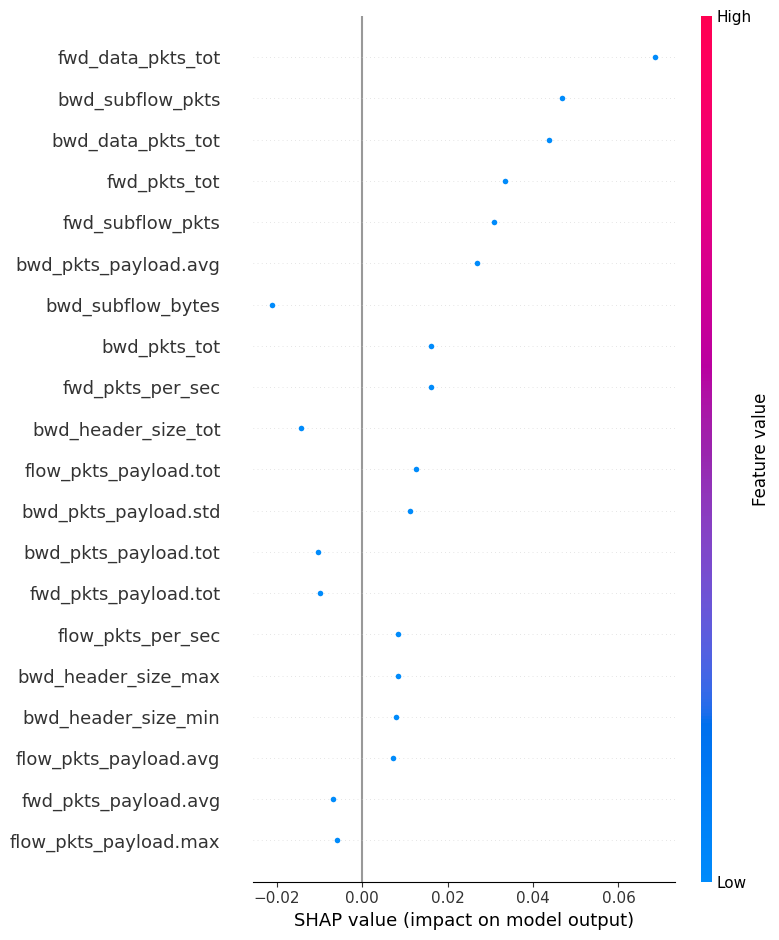

In [27]:
shap.summary_plot(shap_values, features=X_subset_labeled[idx:idx+1], feature_names=feature_names)

## InterpretML

## Shapash

In [28]:
from shapash.explainer.smart_explainer import SmartExplainer

response_dict = {0: 'Normal', 1: 'Malicious'}

xpl = SmartExplainer(model=model,
                     label_dict=response_dict)

pred_shapash = model.predict(X_test_subset_labeled)
pred_series_shapash = pd.Series(pred_shapash.flatten())
pred_series_shapash.index = X_test_subset_labeled.index

xpl.compile(
    x=X_test_subset_labeled,
    y_pred=pred_series_shapash
)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
INFO: Shap explainer type - shap.explainers.PermutationExplainer()
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 38

PermutationExplainer explainer:   1%|▏                | 13/1183 [00:00<?, ?it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   1%|         | 15/1183 [00:11<08:52,  2.19it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:   1%|         | 16/1183 [00:12<12:40,  1.54it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   1%|▏        | 17/1183 [00:13<14:08,  1.37it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:   2%|▏        | 18/1183 [00:13<13:46,  1.41it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:   2%|▏        | 19/1183 [00:14<13:28,  1.44it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step


PermutationExplainer explainer:   2%|▏        | 20/1183 [00:15<13:06,  1.48it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   2%|▏        | 21/1183 [00:15<13:12,  1.47it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   2%|▏        | 22/1183 [00:16<14:52,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:   2%|▏        | 23/1183 [00:17<14:24,  1.34it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   2%|▏        | 24/1183 [00:18<15:21,  1.26it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   2%|▏        | 25/1183 [00:19<16:11,  1.19it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:   2%|▏        | 26/1183 [00:20<16:51,  1.14it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   2%|▏        | 27/1183 [00:20<15:44,  1.22it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:   2%|▏        | 28/1183 [00:21<15:45,  1.22it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   2%|▏        | 29/1183 [00:22<14:45,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   3%|▏        | 30/1183 [00:23<15:19,  1.25it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   3%|▏        | 31/1183 [00:24<15:28,  1.24it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


PermutationExplainer explainer:   3%|▏        | 32/1183 [00:24<15:57,  1.20it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


PermutationExplainer explainer:   3%|▎        | 33/1183 [00:25<16:00,  1.20it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   3%|▎        | 34/1183 [00:26<14:57,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step


PermutationExplainer explainer:   3%|▎        | 35/1183 [00:27<14:15,  1.34it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   3%|▎        | 36/1183 [00:27<13:55,  1.37it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   3%|▎        | 37/1183 [00:28<13:44,  1.39it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   3%|▎        | 38/1183 [00:29<14:51,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   3%|▎        | 39/1183 [00:30<14:17,  1.33it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   3%|▎        | 40/1183 [00:30<14:49,  1.29it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   3%|▎        | 41/1183 [00:31<14:11,  1.34it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   4%|▎        | 42/1183 [00:32<13:38,  1.39it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   4%|▎        | 43/1183 [00:32<13:22,  1.42it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step


PermutationExplainer explainer:   4%|▎        | 44/1183 [00:33<12:59,  1.46it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:   4%|▎        | 45/1183 [00:34<13:54,  1.36it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


PermutationExplainer explainer:   4%|▎        | 46/1183 [00:35<13:39,  1.39it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   4%|▎        | 47/1183 [00:35<14:31,  1.30it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   4%|▎        | 48/1183 [00:36<13:47,  1.37it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:   4%|▎        | 49/1183 [00:37<13:19,  1.42it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   4%|▍        | 50/1183 [00:37<13:12,  1.43it/s]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


PermutationExplainer explainer:   4%|▍        | 51/1183 [00:38<14:30,  1.30it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   4%|▍        | 52/1183 [00:39<14:45,  1.28it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step


PermutationExplainer explainer:   4%|▍        | 53/1183 [00:40<15:23,  1.22it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   5%|▍        | 54/1183 [00:41<15:55,  1.18it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   5%|▍        | 55/1183 [00:42<14:56,  1.26it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   5%|▍        | 56/1183 [00:42<14:01,  1.34it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   5%|▍        | 57/1183 [00:43<15:00,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:   5%|▍        | 58/1183 [00:44<14:11,  1.32it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   5%|▍        | 59/1183 [00:45<14:35,  1.28it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


PermutationExplainer explainer:   5%|▍        | 60/1183 [00:45<13:52,  1.35it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:   5%|▍        | 61/1183 [00:46<14:22,  1.30it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step


PermutationExplainer explainer:   5%|▍        | 62/1183 [00:47<15:05,  1.24it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   5%|▍        | 63/1183 [00:48<15:44,  1.19it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step


PermutationExplainer explainer:   5%|▍        | 64/1183 [00:49<15:46,  1.18it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step


PermutationExplainer explainer:   5%|▍        | 65/1183 [00:50<14:40,  1.27it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:   6%|▌        | 66/1183 [00:50<14:44,  1.26it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


PermutationExplainer explainer:   6%|▌        | 67/1183 [00:51<15:19,  1.21it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:   6%|▌        | 68/1183 [00:52<16:11,  1.15it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:   6%|▌        | 69/1183 [00:53<15:04,  1.23it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:   6%|▌        | 70/1183 [00:54<14:14,  1.30it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   6%|▌        | 71/1183 [00:54<13:43,  1.35it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   6%|▌        | 72/1183 [00:55<13:12,  1.40it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:   6%|▌        | 73/1183 [00:56<13:59,  1.32it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   6%|▌        | 74/1183 [00:56<13:36,  1.36it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   6%|▌        | 75/1183 [00:57<13:13,  1.40it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step


PermutationExplainer explainer:   6%|▌        | 76/1183 [00:58<14:04,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:   7%|▌        | 77/1183 [00:59<13:28,  1.37it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:   7%|▌        | 78/1183 [00:59<12:58,  1.42it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step


PermutationExplainer explainer:   7%|▌        | 79/1183 [01:00<12:52,  1.43it/s]

152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


PermutationExplainer explainer:   7%|▌        | 80/1183 [01:01<13:33,  1.36it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


PermutationExplainer explainer:   7%|▌        | 81/1183 [01:02<14:11,  1.29it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:   7%|▌        | 82/1183 [01:02<14:49,  1.24it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:   7%|▋        | 83/1183 [01:03<14:03,  1.30it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


PermutationExplainer explainer:   7%|▋        | 84/1183 [01:04<14:56,  1.23it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   7%|▋        | 85/1183 [01:05<15:21,  1.19it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step


PermutationExplainer explainer:   7%|▋        | 86/1183 [01:06<14:28,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:   7%|▋        | 87/1183 [01:06<13:52,  1.32it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step


PermutationExplainer explainer:   7%|▋        | 88/1183 [01:07<14:14,  1.28it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step


PermutationExplainer explainer:   8%|▋        | 89/1183 [01:08<14:40,  1.24it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step


PermutationExplainer explainer:   8%|▋        | 90/1183 [01:09<13:59,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step


PermutationExplainer explainer:   8%|▋        | 91/1183 [01:09<13:24,  1.36it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:   8%|▋        | 92/1183 [01:10<14:25,  1.26it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:   8%|▋        | 93/1183 [01:11<15:14,  1.19it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


PermutationExplainer explainer:   8%|▋        | 94/1183 [01:12<14:54,  1.22it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:   8%|▋        | 95/1183 [01:13<15:55,  1.14it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:   8%|▋        | 96/1183 [01:14<16:55,  1.07it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:   8%|▋        | 97/1183 [01:15<15:42,  1.15it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:   8%|▋        | 98/1183 [01:16<16:06,  1.12it/s]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:   8%|▊        | 99/1183 [01:17<15:27,  1.17it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


PermutationExplainer explainer:   8%|▋       | 100/1183 [01:17<15:17,  1.18it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step


PermutationExplainer explainer:   9%|▋       | 101/1183 [01:18<15:53,  1.13it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:   9%|▋       | 102/1183 [01:19<15:48,  1.14it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


PermutationExplainer explainer:   9%|▋       | 103/1183 [01:20<16:28,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:   9%|▋       | 104/1183 [01:21<15:21,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:   9%|▋       | 105/1183 [01:22<14:44,  1.22it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:   9%|▋       | 106/1183 [01:22<14:07,  1.27it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


PermutationExplainer explainer:   9%|▋       | 107/1183 [01:23<14:18,  1.25it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step


PermutationExplainer explainer:   9%|▋       | 108/1183 [01:24<16:01,  1.12it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:   9%|▋       | 109/1183 [01:25<15:56,  1.12it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:   9%|▋       | 110/1183 [01:26<15:20,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:   9%|▊       | 111/1183 [01:27<14:51,  1.20it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


PermutationExplainer explainer:   9%|▊       | 112/1183 [01:28<14:37,  1.22it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


PermutationExplainer explainer:  10%|▊       | 113/1183 [01:29<15:49,  1.13it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  10%|▊       | 114/1183 [01:29<14:59,  1.19it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  10%|▊       | 115/1183 [01:30<14:43,  1.21it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  10%|▊       | 116/1183 [01:31<15:50,  1.12it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


PermutationExplainer explainer:  10%|▊       | 117/1183 [01:32<15:33,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  10%|▊       | 118/1183 [01:33<15:19,  1.16it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  10%|▊       | 119/1183 [01:34<14:59,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:  10%|▊       | 120/1183 [01:35<16:03,  1.10it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:  10%|▊       | 121/1183 [01:35<15:04,  1.17it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:  10%|▊       | 122/1183 [01:36<15:14,  1.16it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  10%|▊       | 123/1183 [01:37<15:39,  1.13it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  10%|▊       | 124/1183 [01:38<14:55,  1.18it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  11%|▊       | 125/1183 [01:39<14:21,  1.23it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  11%|▊       | 126/1183 [01:39<13:42,  1.28it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  11%|▊       | 127/1183 [01:40<13:33,  1.30it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  11%|▊       | 128/1183 [01:41<14:46,  1.19it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  11%|▊       | 129/1183 [01:42<15:30,  1.13it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:  11%|▉       | 130/1183 [01:43<15:41,  1.12it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  11%|▉       | 131/1183 [01:44<15:46,  1.11it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  11%|▉       | 132/1183 [01:45<14:51,  1.18it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:  11%|▉       | 133/1183 [01:45<14:10,  1.23it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


PermutationExplainer explainer:  11%|▉       | 134/1183 [01:46<15:06,  1.16it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:  11%|▉       | 135/1183 [01:47<14:31,  1.20it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  11%|▉       | 136/1183 [01:48<14:49,  1.18it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  12%|▉       | 137/1183 [01:49<14:13,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:  12%|▉       | 138/1183 [01:50<13:41,  1.27it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  12%|▉       | 139/1183 [01:50<13:18,  1.31it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  12%|▉       | 140/1183 [01:51<13:15,  1.31it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  12%|▉       | 141/1183 [01:52<14:26,  1.20it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  12%|▉       | 142/1183 [01:53<13:46,  1.26it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:  12%|▉       | 143/1183 [01:54<14:40,  1.18it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  12%|▉       | 144/1183 [01:55<15:05,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  12%|▉       | 145/1183 [01:55<14:21,  1.21it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  12%|▉       | 146/1183 [01:56<14:01,  1.23it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  12%|▉       | 147/1183 [01:57<14:32,  1.19it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  13%|█       | 148/1183 [01:58<13:45,  1.25it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  13%|█       | 149/1183 [01:58<13:29,  1.28it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step


PermutationExplainer explainer:  13%|█       | 150/1183 [01:59<14:41,  1.17it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  13%|█       | 151/1183 [02:00<15:22,  1.12it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  13%|█       | 152/1183 [02:01<15:49,  1.09it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  13%|█       | 153/1183 [02:02<15:52,  1.08it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:  13%|█       | 154/1183 [02:03<14:49,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  13%|█       | 155/1183 [02:04<14:05,  1.22it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:  13%|█       | 156/1183 [02:05<14:44,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  13%|█       | 157/1183 [02:06<14:03,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  13%|█       | 158/1183 [02:06<13:42,  1.25it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  13%|█       | 159/1183 [02:07<13:15,  1.29it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


PermutationExplainer explainer:  14%|█       | 160/1183 [02:08<12:55,  1.32it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:  14%|█       | 161/1183 [02:08<12:44,  1.34it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  14%|█       | 162/1183 [02:09<14:09,  1.20it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:  14%|█       | 163/1183 [02:10<13:37,  1.25it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  14%|█       | 164/1183 [02:11<12:59,  1.31it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  14%|█       | 165/1183 [02:12<12:34,  1.35it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  14%|█       | 166/1183 [02:13<13:44,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:  14%|█▏      | 167/1183 [02:13<14:30,  1.17it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:  14%|█▏      | 168/1183 [02:15<15:23,  1.10it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  14%|█▏      | 169/1183 [02:15<14:22,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  14%|█▏      | 170/1183 [02:16<14:43,  1.15it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  14%|█▏      | 171/1183 [02:17<14:40,  1.15it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  15%|█▏      | 172/1183 [02:18<15:05,  1.12it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  15%|█▏      | 173/1183 [02:19<14:12,  1.19it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:  15%|█▏      | 174/1183 [02:20<14:34,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  15%|█▏      | 175/1183 [02:20<13:50,  1.21it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:  15%|█▏      | 176/1183 [02:21<13:36,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


PermutationExplainer explainer:  15%|█▏      | 177/1183 [02:22<14:30,  1.16it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  15%|█▏      | 178/1183 [02:23<13:52,  1.21it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:  15%|█▏      | 179/1183 [02:24<14:21,  1.16it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:  15%|█▏      | 180/1183 [02:25<15:05,  1.11it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


PermutationExplainer explainer:  15%|█▏      | 181/1183 [02:25<14:06,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


PermutationExplainer explainer:  15%|█▏      | 182/1183 [02:27<14:57,  1.12it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  15%|█▏      | 183/1183 [02:28<15:28,  1.08it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  16%|█▏      | 184/1183 [02:28<15:35,  1.07it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:  16%|█▎      | 185/1183 [02:29<14:24,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:  16%|█▎      | 186/1183 [02:30<13:34,  1.22it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  16%|█▎      | 187/1183 [02:31<13:11,  1.26it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:  16%|█▎      | 188/1183 [02:32<14:05,  1.18it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:  16%|█▎      | 189/1183 [02:32<14:18,  1.16it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:  16%|█▎      | 190/1183 [02:33<14:50,  1.12it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  16%|█▎      | 191/1183 [02:34<15:03,  1.10it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  16%|█▎      | 192/1183 [02:35<14:06,  1.17it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  16%|█▎      | 193/1183 [02:36<14:50,  1.11it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:  16%|█▎      | 194/1183 [02:37<15:00,  1.10it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  16%|█▎      | 195/1183 [02:38<15:03,  1.09it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


PermutationExplainer explainer:  17%|█▎      | 196/1183 [02:39<14:34,  1.13it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


PermutationExplainer explainer:  17%|█▎      | 197/1183 [02:40<16:03,  1.02it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


PermutationExplainer explainer:  17%|█▎      | 198/1183 [02:41<15:18,  1.07it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  17%|█▎      | 199/1183 [02:42<15:09,  1.08it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


PermutationExplainer explainer:  17%|█▎      | 200/1183 [02:43<16:00,  1.02it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


PermutationExplainer explainer:  17%|█▎      | 201/1183 [02:44<17:47,  1.09s/it]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  17%|█▎      | 202/1183 [02:45<17:01,  1.04s/it]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  17%|█▎      | 203/1183 [02:46<15:48,  1.03it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  17%|█▍      | 204/1183 [02:47<15:03,  1.08it/s]

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  17%|█▍      | 205/1183 [02:48<15:38,  1.04it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  17%|█▍      | 206/1183 [02:49<15:44,  1.03it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  17%|█▍      | 207/1183 [02:50<14:44,  1.10it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step


PermutationExplainer explainer:  18%|█▍      | 208/1183 [02:50<14:25,  1.13it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  18%|█▍      | 209/1183 [02:51<14:22,  1.13it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  18%|█▍      | 210/1183 [02:52<15:23,  1.05it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


PermutationExplainer explainer:  18%|█▍      | 211/1183 [02:53<15:39,  1.03it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  18%|█▍      | 212/1183 [02:54<15:41,  1.03it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  18%|█▍      | 213/1183 [02:55<14:47,  1.09it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:  18%|█▍      | 214/1183 [02:56<14:14,  1.13it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


PermutationExplainer explainer:  18%|█▍      | 215/1183 [02:57<13:40,  1.18it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:  18%|█▍      | 216/1183 [02:58<14:44,  1.09it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  18%|█▍      | 217/1183 [02:59<15:05,  1.07it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  18%|█▍      | 218/1183 [03:00<15:23,  1.05it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


PermutationExplainer explainer:  19%|█▍      | 219/1183 [03:01<15:39,  1.03it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:  19%|█▍      | 220/1183 [03:02<14:44,  1.09it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  19%|█▍      | 221/1183 [03:02<14:07,  1.14it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


PermutationExplainer explainer:  19%|█▌      | 222/1183 [03:03<13:41,  1.17it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  19%|█▌      | 223/1183 [03:04<14:31,  1.10it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  19%|█▌      | 224/1183 [03:05<15:13,  1.05it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  19%|█▌      | 225/1183 [03:06<15:42,  1.02it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  19%|█▌      | 226/1183 [03:07<15:36,  1.02it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:  19%|█▌      | 227/1183 [03:08<16:19,  1.03s/it]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


PermutationExplainer explainer:  19%|█▌      | 228/1183 [03:09<15:08,  1.05it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


PermutationExplainer explainer:  19%|█▌      | 229/1183 [03:10<15:02,  1.06it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


PermutationExplainer explainer:  19%|█▌      | 230/1183 [03:11<15:23,  1.03it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  20%|█▌      | 231/1183 [03:12<15:32,  1.02it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step


PermutationExplainer explainer:  20%|█▌      | 232/1183 [03:13<14:28,  1.10it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


PermutationExplainer explainer:  20%|█▌      | 233/1183 [03:14<13:53,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:  20%|█▌      | 234/1183 [03:14<13:26,  1.18it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:  20%|█▌      | 235/1183 [03:15<12:49,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


PermutationExplainer explainer:  20%|█▌      | 236/1183 [03:16<13:34,  1.16it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  20%|█▌      | 237/1183 [03:17<13:14,  1.19it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  20%|█▌      | 238/1183 [03:18<13:53,  1.13it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  20%|█▌      | 239/1183 [03:19<14:11,  1.11it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  20%|█▌      | 240/1183 [03:20<13:19,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  20%|█▋      | 241/1183 [03:21<13:37,  1.15it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


PermutationExplainer explainer:  20%|█▋      | 242/1183 [03:21<12:52,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  21%|█▋      | 243/1183 [03:22<12:33,  1.25it/s]

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


PermutationExplainer explainer:  21%|█▋      | 244/1183 [03:23<12:08,  1.29it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  21%|█▋      | 245/1183 [03:23<11:50,  1.32it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  21%|█▋      | 246/1183 [03:24<12:50,  1.22it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  21%|█▋      | 247/1183 [03:25<12:36,  1.24it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  21%|█▋      | 248/1183 [03:26<12:02,  1.29it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:  21%|█▋      | 249/1183 [03:27<12:31,  1.24it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  21%|█▋      | 250/1183 [03:27<11:53,  1.31it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  21%|█▋      | 251/1183 [03:28<11:33,  1.34it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  21%|█▋      | 252/1183 [03:29<11:15,  1.38it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  21%|█▋      | 253/1183 [03:29<11:05,  1.40it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:  21%|█▋      | 254/1183 [03:30<11:01,  1.40it/s]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:  22%|█▋      | 255/1183 [03:31<11:09,  1.39it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  22%|█▋      | 256/1183 [03:32<12:19,  1.25it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:  22%|█▋      | 257/1183 [03:33<12:57,  1.19it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  22%|█▋      | 258/1183 [03:34<12:25,  1.24it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  22%|█▊      | 259/1183 [03:34<11:51,  1.30it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  22%|█▊      | 260/1183 [03:35<12:45,  1.21it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


PermutationExplainer explainer:  22%|█▊      | 261/1183 [03:36<13:16,  1.16it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


PermutationExplainer explainer:  22%|█▊      | 262/1183 [03:37<13:55,  1.10it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:  22%|█▊      | 263/1183 [03:38<13:12,  1.16it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  22%|█▊      | 264/1183 [03:39<12:56,  1.18it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:  22%|█▊      | 265/1183 [03:40<13:28,  1.14it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:  22%|█▊      | 266/1183 [03:40<12:45,  1.20it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


PermutationExplainer explainer:  23%|█▊      | 267/1183 [03:42<13:52,  1.10it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  23%|█▊      | 268/1183 [03:42<13:05,  1.17it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


PermutationExplainer explainer:  23%|█▊      | 269/1183 [03:43<12:49,  1.19it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


PermutationExplainer explainer:  23%|█▊      | 270/1183 [03:44<12:32,  1.21it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


PermutationExplainer explainer:  23%|█▊      | 271/1183 [03:45<12:31,  1.21it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  23%|█▊      | 272/1183 [03:45<12:18,  1.23it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


PermutationExplainer explainer:  23%|█▊      | 273/1183 [03:46<13:16,  1.14it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:  23%|█▊      | 274/1183 [03:47<13:38,  1.11it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


PermutationExplainer explainer:  23%|█▊      | 275/1183 [03:48<13:52,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  23%|█▊      | 276/1183 [03:49<13:18,  1.14it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


PermutationExplainer explainer:  23%|█▊      | 277/1183 [03:50<13:05,  1.15it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  23%|█▉      | 278/1183 [03:51<13:56,  1.08it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step


PermutationExplainer explainer:  24%|█▉      | 279/1183 [03:52<14:46,  1.02it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


PermutationExplainer explainer:  24%|█▉      | 280/1183 [03:53<14:14,  1.06it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  24%|█▉      | 281/1183 [03:54<14:33,  1.03it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  24%|█▉      | 282/1183 [03:55<14:50,  1.01it/s]

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  24%|█▉      | 283/1183 [03:56<15:08,  1.01s/it]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


PermutationExplainer explainer:  24%|█▉      | 284/1183 [03:57<14:06,  1.06it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  24%|█▉      | 285/1183 [03:58<13:13,  1.13it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  24%|█▉      | 286/1183 [03:58<12:44,  1.17it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


PermutationExplainer explainer:  24%|█▉      | 287/1183 [03:59<12:24,  1.20it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


PermutationExplainer explainer:  24%|█▉      | 288/1183 [04:00<13:18,  1.12it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


PermutationExplainer explainer:  24%|█▉      | 289/1183 [04:02<14:50,  1.00it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


PermutationExplainer explainer:  25%|█▉      | 290/1183 [04:02<14:04,  1.06it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  25%|█▉      | 291/1183 [04:03<13:30,  1.10it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


PermutationExplainer explainer:  25%|█▉      | 292/1183 [04:04<13:20,  1.11it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  25%|█▉      | 293/1183 [04:05<13:54,  1.07it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  25%|█▉      | 294/1183 [04:06<13:39,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  25%|█▉      | 295/1183 [04:07<12:48,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  25%|██      | 296/1183 [04:07<12:09,  1.22it/s]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


PermutationExplainer explainer:  25%|██      | 297/1183 [04:08<12:27,  1.18it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


PermutationExplainer explainer:  25%|██      | 298/1183 [04:09<13:04,  1.13it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  25%|██      | 299/1183 [04:10<13:51,  1.06it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step


PermutationExplainer explainer:  25%|██      | 300/1183 [04:11<14:09,  1.04it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


PermutationExplainer explainer:  25%|██      | 301/1183 [04:12<14:20,  1.02it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  26%|██      | 302/1183 [04:13<14:19,  1.03it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  26%|██      | 303/1183 [04:14<13:27,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:  26%|██      | 304/1183 [04:15<12:42,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


PermutationExplainer explainer:  26%|██      | 305/1183 [04:16<12:27,  1.17it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  26%|██      | 306/1183 [04:16<12:00,  1.22it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


PermutationExplainer explainer:  26%|██      | 307/1183 [04:17<11:38,  1.25it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


PermutationExplainer explainer:  26%|██      | 308/1183 [04:18<12:26,  1.17it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  26%|██      | 309/1183 [04:19<12:16,  1.19it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  26%|██      | 310/1183 [04:20<13:15,  1.10it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  26%|██      | 311/1183 [04:21<13:32,  1.07it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:  26%|██      | 312/1183 [04:22<12:47,  1.14it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


PermutationExplainer explainer:  26%|██      | 313/1183 [04:23<12:13,  1.19it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step


PermutationExplainer explainer:  27%|██      | 314/1183 [04:23<12:30,  1.16it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  27%|██▏     | 315/1183 [04:25<13:15,  1.09it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:  27%|██▏     | 316/1183 [04:25<12:56,  1.12it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  27%|██▏     | 317/1183 [04:26<12:30,  1.15it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:  27%|██▏     | 318/1183 [04:27<11:59,  1.20it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  27%|██▏     | 319/1183 [04:28<12:29,  1.15it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  27%|██▏     | 320/1183 [04:29<12:02,  1.19it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  27%|██▏     | 321/1183 [04:30<12:19,  1.17it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  27%|██▏     | 322/1183 [04:30<11:46,  1.22it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:  27%|██▏     | 323/1183 [04:31<11:12,  1.28it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  27%|██▏     | 324/1183 [04:32<10:49,  1.32it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:  27%|██▏     | 325/1183 [04:32<10:37,  1.35it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


PermutationExplainer explainer:  28%|██▏     | 326/1183 [04:33<11:45,  1.21it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


PermutationExplainer explainer:  28%|██▏     | 327/1183 [04:35<13:14,  1.08it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


PermutationExplainer explainer:  28%|██▏     | 328/1183 [04:36<14:13,  1.00it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


PermutationExplainer explainer:  28%|██▏     | 329/1183 [04:37<13:27,  1.06it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


PermutationExplainer explainer:  28%|██▏     | 330/1183 [04:38<13:41,  1.04it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:  28%|██▏     | 331/1183 [04:38<12:52,  1.10it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  28%|██▏     | 332/1183 [04:39<11:56,  1.19it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  28%|██▎     | 333/1183 [04:40<11:26,  1.24it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  28%|██▎     | 334/1183 [04:41<11:16,  1.25it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  28%|██▎     | 335/1183 [04:41<11:07,  1.27it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  28%|██▎     | 336/1183 [04:42<11:07,  1.27it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:  28%|██▎     | 337/1183 [04:43<11:55,  1.18it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:  29%|██▎     | 338/1183 [04:44<12:04,  1.17it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  29%|██▎     | 339/1183 [04:45<11:44,  1.20it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


PermutationExplainer explainer:  29%|██▎     | 340/1183 [04:46<12:40,  1.11it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:  29%|██▎     | 341/1183 [04:47<12:18,  1.14it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


PermutationExplainer explainer:  29%|██▎     | 342/1183 [04:47<12:15,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  29%|██▎     | 343/1183 [04:48<11:45,  1.19it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


PermutationExplainer explainer:  29%|██▎     | 344/1183 [04:49<11:26,  1.22it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  29%|██▎     | 345/1183 [04:50<11:50,  1.18it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:  29%|██▎     | 346/1183 [04:51<12:14,  1.14it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step


PermutationExplainer explainer:  29%|██▎     | 347/1183 [04:52<12:32,  1.11it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  29%|██▎     | 348/1183 [04:53<12:58,  1.07it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:  30%|██▎     | 349/1183 [04:54<12:08,  1.15it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  30%|██▎     | 350/1183 [04:54<12:24,  1.12it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  30%|██▎     | 351/1183 [04:55<11:43,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  30%|██▍     | 352/1183 [04:56<12:17,  1.13it/s]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  30%|██▍     | 353/1183 [04:57<12:17,  1.12it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  30%|██▍     | 354/1183 [04:58<11:44,  1.18it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


PermutationExplainer explainer:  30%|██▍     | 355/1183 [04:59<11:19,  1.22it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step


PermutationExplainer explainer:  30%|██▍     | 356/1183 [04:59<11:11,  1.23it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  30%|██▍     | 357/1183 [05:00<11:58,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:  30%|██▍     | 358/1183 [05:01<11:27,  1.20it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


PermutationExplainer explainer:  30%|██▍     | 359/1183 [05:02<11:46,  1.17it/s]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step


PermutationExplainer explainer:  30%|██▍     | 360/1183 [05:03<11:33,  1.19it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:  31%|██▍     | 361/1183 [05:04<11:21,  1.21it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


PermutationExplainer explainer:  31%|██▍     | 362/1183 [05:05<11:30,  1.19it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step


PermutationExplainer explainer:  31%|██▍     | 363/1183 [05:06<12:20,  1.11it/s]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  31%|██▍     | 364/1183 [05:07<12:49,  1.06it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


PermutationExplainer explainer:  31%|██▍     | 365/1183 [05:07<12:15,  1.11it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  31%|██▍     | 366/1183 [05:09<13:19,  1.02it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:  31%|██▍     | 367/1183 [05:09<12:21,  1.10it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


PermutationExplainer explainer:  31%|██▍     | 368/1183 [05:10<11:36,  1.17it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


PermutationExplainer explainer:  31%|██▍     | 369/1183 [05:11<12:28,  1.09it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


PermutationExplainer explainer:  31%|██▌     | 370/1183 [05:12<12:02,  1.12it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


PermutationExplainer explainer:  31%|██▌     | 371/1183 [05:13<11:39,  1.16it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:  31%|██▌     | 372/1183 [05:14<12:25,  1.09it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


PermutationExplainer explainer:  32%|██▌     | 373/1183 [05:15<12:48,  1.05it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


PermutationExplainer explainer:  32%|██▌     | 374/1183 [05:16<12:03,  1.12it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  32%|██▌     | 375/1183 [05:17<12:22,  1.09it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step


PermutationExplainer explainer:  32%|██▌     | 376/1183 [05:17<11:30,  1.17it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step


PermutationExplainer explainer:  32%|██▌     | 377/1183 [05:18<10:58,  1.22it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  32%|██▌     | 378/1183 [05:19<11:21,  1.18it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  32%|██▌     | 379/1183 [05:20<11:03,  1.21it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


PermutationExplainer explainer:  32%|██▌     | 380/1183 [05:20<10:57,  1.22it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  32%|██▌     | 381/1183 [05:22<11:55,  1.12it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  32%|██▌     | 382/1183 [05:23<12:47,  1.04it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  32%|██▌     | 383/1183 [05:23<12:04,  1.10it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  32%|██▌     | 384/1183 [05:24<11:29,  1.16it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step


PermutationExplainer explainer:  33%|██▌     | 385/1183 [05:25<11:03,  1.20it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


PermutationExplainer explainer:  33%|██▌     | 386/1183 [05:26<12:00,  1.11it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


PermutationExplainer explainer:  33%|██▌     | 387/1183 [05:27<12:22,  1.07it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


PermutationExplainer explainer:  33%|██▌     | 388/1183 [05:28<11:58,  1.11it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


PermutationExplainer explainer:  33%|██▋     | 389/1183 [05:29<11:42,  1.13it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  33%|██▋     | 390/1183 [05:30<12:28,  1.06it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:  33%|██▋     | 391/1183 [05:31<12:26,  1.06it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  33%|██▋     | 392/1183 [05:32<11:44,  1.12it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  33%|██▋     | 393/1183 [05:32<11:53,  1.11it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  33%|██▋     | 394/1183 [05:33<11:58,  1.10it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


PermutationExplainer explainer:  33%|██▋     | 395/1183 [05:34<12:31,  1.05it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


PermutationExplainer explainer:  33%|██▋     | 396/1183 [05:35<12:48,  1.02it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  34%|██▋     | 397/1183 [05:37<13:26,  1.03s/it]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step


PermutationExplainer explainer:  34%|██▋     | 398/1183 [05:38<13:16,  1.01s/it]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:  34%|██▋     | 399/1183 [05:38<12:19,  1.06it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


PermutationExplainer explainer:  34%|██▋     | 400/1183 [05:39<11:18,  1.15it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  34%|██▋     | 401/1183 [05:40<11:26,  1.14it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step


PermutationExplainer explainer:  34%|██▋     | 402/1183 [05:41<10:36,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:  34%|██▋     | 403/1183 [05:41<10:03,  1.29it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


PermutationExplainer explainer:  34%|██▋     | 404/1183 [05:42<10:00,  1.30it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:  34%|██▋     | 405/1183 [05:43<10:40,  1.21it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  34%|██▋     | 406/1183 [05:44<11:10,  1.16it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  34%|██▊     | 407/1183 [05:45<10:35,  1.22it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  34%|██▊     | 408/1183 [05:46<11:21,  1.14it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


PermutationExplainer explainer:  35%|██▊     | 409/1183 [05:47<11:47,  1.09it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  35%|██▊     | 410/1183 [05:47<11:13,  1.15it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step


PermutationExplainer explainer:  35%|██▊     | 411/1183 [05:48<11:44,  1.10it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:  35%|██▊     | 412/1183 [05:49<11:44,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  35%|██▊     | 413/1183 [05:50<10:52,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  35%|██▊     | 414/1183 [05:51<11:10,  1.15it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  35%|██▊     | 415/1183 [05:52<11:44,  1.09it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  35%|██▊     | 416/1183 [05:53<11:59,  1.07it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  35%|██▊     | 417/1183 [05:54<11:20,  1.13it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  35%|██▊     | 418/1183 [05:55<11:38,  1.10it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  35%|██▊     | 419/1183 [05:56<11:52,  1.07it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step


PermutationExplainer explainer:  36%|██▊     | 420/1183 [05:57<12:04,  1.05it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:  36%|██▊     | 421/1183 [05:57<11:14,  1.13it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  36%|██▊     | 422/1183 [05:58<11:10,  1.13it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:  36%|██▊     | 423/1183 [05:59<11:21,  1.12it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step


PermutationExplainer explainer:  36%|██▊     | 424/1183 [06:00<11:28,  1.10it/s]

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  36%|██▊     | 425/1183 [06:01<11:04,  1.14it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  36%|██▉     | 426/1183 [06:02<10:31,  1.20it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


PermutationExplainer explainer:  36%|██▉     | 427/1183 [06:02<10:09,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step


PermutationExplainer explainer:  36%|██▉     | 428/1183 [06:03<09:51,  1.28it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  36%|██▉     | 429/1183 [06:04<10:33,  1.19it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  36%|██▉     | 430/1183 [06:05<10:59,  1.14it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  36%|██▉     | 431/1183 [06:06<10:25,  1.20it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


PermutationExplainer explainer:  37%|██▉     | 432/1183 [06:07<10:10,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:  37%|██▉     | 433/1183 [06:07<10:01,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  37%|██▉     | 434/1183 [06:08<09:42,  1.28it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  37%|██▉     | 435/1183 [06:09<10:26,  1.19it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  37%|██▉     | 436/1183 [06:10<10:01,  1.24it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  37%|██▉     | 437/1183 [06:11<09:36,  1.29it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step


PermutationExplainer explainer:  37%|██▉     | 438/1183 [06:11<09:27,  1.31it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  37%|██▉     | 439/1183 [06:12<09:17,  1.33it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  37%|██▉     | 440/1183 [06:13<09:07,  1.36it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  37%|██▉     | 441/1183 [06:14<10:08,  1.22it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  37%|██▉     | 442/1183 [06:14<09:54,  1.25it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  37%|██▉     | 443/1183 [06:15<09:36,  1.28it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:  38%|███     | 444/1183 [06:16<09:23,  1.31it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  38%|███     | 445/1183 [06:17<09:48,  1.25it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  38%|███     | 446/1183 [06:18<10:18,  1.19it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:  38%|███     | 447/1183 [06:19<09:59,  1.23it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  38%|███     | 448/1183 [06:19<10:25,  1.18it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:  38%|███     | 449/1183 [06:20<10:54,  1.12it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  38%|███     | 450/1183 [06:21<10:12,  1.20it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step


PermutationExplainer explainer:  38%|███     | 451/1183 [06:22<10:08,  1.20it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  38%|███     | 452/1183 [06:23<10:08,  1.20it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  38%|███     | 453/1183 [06:24<09:57,  1.22it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  38%|███     | 454/1183 [06:24<09:38,  1.26it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  38%|███     | 455/1183 [06:25<09:16,  1.31it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:  39%|███     | 456/1183 [06:26<09:36,  1.26it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:  39%|███     | 457/1183 [06:27<09:20,  1.30it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  39%|███     | 458/1183 [06:27<09:17,  1.30it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step


PermutationExplainer explainer:  39%|███     | 459/1183 [06:28<09:21,  1.29it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  39%|███     | 460/1183 [06:29<10:13,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


PermutationExplainer explainer:  39%|███     | 461/1183 [06:30<11:03,  1.09it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


PermutationExplainer explainer:  39%|███     | 462/1183 [06:31<11:52,  1.01it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  39%|███▏    | 463/1183 [06:32<11:10,  1.07it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step


PermutationExplainer explainer:  39%|███▏    | 464/1183 [06:33<11:20,  1.06it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  39%|███▏    | 465/1183 [06:34<11:13,  1.07it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  39%|███▏    | 466/1183 [06:35<10:38,  1.12it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  39%|███▏    | 467/1183 [06:36<10:56,  1.09it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  40%|███▏    | 468/1183 [06:37<10:50,  1.10it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


PermutationExplainer explainer:  40%|███▏    | 469/1183 [06:38<11:01,  1.08it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:  40%|███▏    | 470/1183 [06:39<10:49,  1.10it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:  40%|███▏    | 471/1183 [06:39<10:04,  1.18it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step


PermutationExplainer explainer:  40%|███▏    | 472/1183 [06:40<10:13,  1.16it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


PermutationExplainer explainer:  40%|███▏    | 473/1183 [06:41<10:09,  1.17it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  40%|███▏    | 474/1183 [06:42<09:28,  1.25it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  40%|███▏    | 475/1183 [06:42<08:59,  1.31it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  40%|███▏    | 476/1183 [06:43<09:29,  1.24it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  40%|███▏    | 477/1183 [06:44<09:21,  1.26it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  40%|███▏    | 478/1183 [06:45<09:23,  1.25it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


PermutationExplainer explainer:  40%|███▏    | 479/1183 [06:46<10:24,  1.13it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step


PermutationExplainer explainer:  41%|███▏    | 480/1183 [06:47<10:19,  1.13it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step


PermutationExplainer explainer:  41%|███▎    | 481/1183 [06:48<11:12,  1.04it/s]

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


PermutationExplainer explainer:  41%|███▎    | 482/1183 [06:49<12:09,  1.04s/it]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:  41%|███▎    | 483/1183 [06:50<12:34,  1.08s/it]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  41%|███▎    | 484/1183 [06:51<12:37,  1.08s/it]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:  41%|███▎    | 485/1183 [06:52<11:39,  1.00s/it]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  41%|███▎    | 486/1183 [06:53<11:45,  1.01s/it]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:  41%|███▎    | 487/1183 [06:54<11:32,  1.01it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:  41%|███▎    | 488/1183 [06:55<10:44,  1.08it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step


PermutationExplainer explainer:  41%|███▎    | 489/1183 [06:56<10:48,  1.07it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  41%|███▎    | 490/1183 [06:57<11:06,  1.04it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


PermutationExplainer explainer:  42%|███▎    | 491/1183 [06:58<11:04,  1.04it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  42%|███▎    | 492/1183 [06:59<10:15,  1.12it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:  42%|███▎    | 493/1183 [07:00<10:25,  1.10it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  42%|███▎    | 494/1183 [07:01<10:37,  1.08it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:  42%|███▎    | 495/1183 [07:02<10:59,  1.04it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


PermutationExplainer explainer:  42%|███▎    | 496/1183 [07:02<10:28,  1.09it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  42%|███▎    | 497/1183 [07:03<10:02,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  42%|███▎    | 498/1183 [07:04<09:41,  1.18it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


PermutationExplainer explainer:  42%|███▎    | 499/1183 [07:05<10:10,  1.12it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  42%|███▍    | 500/1183 [07:06<09:43,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  42%|███▍    | 501/1183 [07:07<09:24,  1.21it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  42%|███▍    | 502/1183 [07:07<09:02,  1.26it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step


PermutationExplainer explainer:  43%|███▍    | 503/1183 [07:08<08:58,  1.26it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  43%|███▍    | 504/1183 [07:09<08:50,  1.28it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


PermutationExplainer explainer:  43%|███▍    | 505/1183 [07:10<09:49,  1.15it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  43%|███▍    | 506/1183 [07:11<10:22,  1.09it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


PermutationExplainer explainer:  43%|███▍    | 507/1183 [07:12<09:56,  1.13it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step


PermutationExplainer explainer:  43%|███▍    | 508/1183 [07:13<09:42,  1.16it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  43%|███▍    | 509/1183 [07:13<09:40,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  43%|███▍    | 510/1183 [07:14<09:23,  1.20it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:  43%|███▍    | 511/1183 [07:15<09:57,  1.12it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


PermutationExplainer explainer:  43%|███▍    | 512/1183 [07:16<09:42,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  43%|███▍    | 513/1183 [07:17<09:16,  1.20it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:  43%|███▍    | 514/1183 [07:18<10:29,  1.06it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


PermutationExplainer explainer:  44%|███▍    | 515/1183 [07:19<10:02,  1.11it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


PermutationExplainer explainer:  44%|███▍    | 516/1183 [07:20<09:40,  1.15it/s]

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  44%|███▍    | 517/1183 [07:21<10:13,  1.09it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


PermutationExplainer explainer:  44%|███▌    | 518/1183 [07:21<09:35,  1.16it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


PermutationExplainer explainer:  44%|███▌    | 519/1183 [07:22<09:25,  1.17it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step


PermutationExplainer explainer:  44%|███▌    | 520/1183 [07:23<09:04,  1.22it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  44%|███▌    | 521/1183 [07:24<08:47,  1.25it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


PermutationExplainer explainer:  44%|███▌    | 522/1183 [07:24<08:40,  1.27it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  44%|███▌    | 523/1183 [07:25<08:35,  1.28it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step


PermutationExplainer explainer:  44%|███▌    | 524/1183 [07:26<09:07,  1.20it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step


PermutationExplainer explainer:  44%|███▌    | 525/1183 [07:27<09:02,  1.21it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  44%|███▌    | 526/1183 [07:28<09:00,  1.21it/s]

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step


PermutationExplainer explainer:  45%|███▌    | 527/1183 [07:29<09:04,  1.20it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  45%|███▌    | 528/1183 [07:30<09:47,  1.11it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  45%|███▌    | 529/1183 [07:31<10:05,  1.08it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step


PermutationExplainer explainer:  45%|███▌    | 530/1183 [07:32<10:13,  1.06it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  45%|███▌    | 531/1183 [07:32<09:39,  1.12it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:  45%|███▌    | 532/1183 [07:33<09:53,  1.10it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  45%|███▌    | 533/1183 [07:34<09:23,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  45%|███▌    | 534/1183 [07:35<08:53,  1.22it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  45%|███▌    | 535/1183 [07:36<09:31,  1.13it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step


PermutationExplainer explainer:  45%|███▌    | 536/1183 [07:37<09:06,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  45%|███▋    | 537/1183 [07:37<08:49,  1.22it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


PermutationExplainer explainer:  45%|███▋    | 538/1183 [07:38<08:37,  1.25it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  46%|███▋    | 539/1183 [07:39<09:22,  1.14it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


PermutationExplainer explainer:  46%|███▋    | 540/1183 [07:40<09:41,  1.11it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


PermutationExplainer explainer:  46%|███▋    | 541/1183 [07:41<10:10,  1.05it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  46%|███▋    | 542/1183 [07:42<10:25,  1.02it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step


PermutationExplainer explainer:  46%|███▋    | 543/1183 [07:43<10:01,  1.06it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


PermutationExplainer explainer:  46%|███▋    | 544/1183 [07:44<09:36,  1.11it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


PermutationExplainer explainer:  46%|███▋    | 545/1183 [07:45<09:09,  1.16it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step


PermutationExplainer explainer:  46%|███▋    | 546/1183 [07:46<09:37,  1.10it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  46%|███▋    | 547/1183 [07:47<09:55,  1.07it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  46%|███▋    | 548/1183 [07:48<10:10,  1.04it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step


PermutationExplainer explainer:  46%|███▋    | 549/1183 [07:49<09:55,  1.07it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  46%|███▋    | 550/1183 [07:49<09:22,  1.13it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  47%|███▋    | 551/1183 [07:50<08:59,  1.17it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  47%|███▋    | 552/1183 [07:51<09:10,  1.15it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  47%|███▋    | 553/1183 [07:52<08:35,  1.22it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step


PermutationExplainer explainer:  47%|███▋    | 554/1183 [07:53<09:15,  1.13it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


PermutationExplainer explainer:  47%|███▊    | 555/1183 [07:54<08:49,  1.18it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  47%|███▊    | 556/1183 [07:54<08:48,  1.19it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  47%|███▊    | 557/1183 [07:55<08:33,  1.22it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step


PermutationExplainer explainer:  47%|███▊    | 558/1183 [07:56<08:13,  1.27it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:  47%|███▊    | 559/1183 [07:57<07:58,  1.30it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  47%|███▊    | 560/1183 [07:58<08:35,  1.21it/s]

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step


PermutationExplainer explainer:  47%|███▊    | 561/1183 [07:59<09:16,  1.12it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


PermutationExplainer explainer:  48%|███▊    | 562/1183 [07:59<09:01,  1.15it/s]

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


PermutationExplainer explainer:  48%|███▊    | 563/1183 [08:00<09:27,  1.09it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step


PermutationExplainer explainer:  48%|███▊    | 564/1183 [08:01<09:05,  1.13it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  48%|███▊    | 565/1183 [08:02<08:44,  1.18it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  48%|███▊    | 566/1183 [08:03<09:23,  1.09it/s]

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  48%|███▊    | 567/1183 [08:04<09:33,  1.07it/s]

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


PermutationExplainer explainer:  48%|███▊    | 568/1183 [08:05<09:48,  1.05it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:  48%|███▊    | 569/1183 [08:06<09:58,  1.03it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


PermutationExplainer explainer:  48%|███▊    | 570/1183 [08:07<09:58,  1.02it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  48%|███▊    | 571/1183 [08:08<09:27,  1.08it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step


PermutationExplainer explainer:  48%|███▊    | 572/1183 [08:09<09:04,  1.12it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step


PermutationExplainer explainer:  48%|███▊    | 573/1183 [08:10<09:07,  1.11it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  49%|███▉    | 574/1183 [08:11<09:23,  1.08it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


PermutationExplainer explainer:  49%|███▉    | 575/1183 [08:12<09:53,  1.03it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  49%|███▉    | 576/1183 [08:12<09:23,  1.08it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


PermutationExplainer explainer:  49%|███▉    | 577/1183 [08:13<08:55,  1.13it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step


PermutationExplainer explainer:  49%|███▉    | 578/1183 [08:14<09:44,  1.04it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step


PermutationExplainer explainer:  49%|███▉    | 579/1183 [08:15<09:24,  1.07it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  49%|███▉    | 580/1183 [08:16<09:22,  1.07it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


PermutationExplainer explainer:  49%|███▉    | 581/1183 [08:17<08:52,  1.13it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


PermutationExplainer explainer:  49%|███▉    | 582/1183 [08:18<08:48,  1.14it/s]

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:  49%|███▉    | 583/1183 [08:19<08:54,  1.12it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


PermutationExplainer explainer:  49%|███▉    | 584/1183 [08:20<09:16,  1.08it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


PermutationExplainer explainer:  49%|███▉    | 585/1183 [08:21<09:37,  1.03it/s]

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


PermutationExplainer explainer:  50%|███▉    | 586/1183 [08:22<09:51,  1.01it/s]

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


PermutationExplainer explainer:  50%|███▉    | 587/1183 [08:23<10:17,  1.04s/it]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  50%|███▉    | 588/1183 [08:24<09:28,  1.05it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:  50%|███▉    | 589/1183 [08:25<08:58,  1.10it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  50%|███▉    | 590/1183 [08:26<09:14,  1.07it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  50%|███▉    | 591/1183 [08:26<09:00,  1.10it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step


PermutationExplainer explainer:  50%|████    | 592/1183 [08:27<09:10,  1.07it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  50%|████    | 593/1183 [08:28<09:11,  1.07it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  50%|████    | 594/1183 [08:29<08:35,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:  50%|████    | 595/1183 [08:30<08:08,  1.20it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  50%|████    | 596/1183 [08:31<07:46,  1.26it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step


PermutationExplainer explainer:  50%|████    | 597/1183 [08:32<08:18,  1.18it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step


PermutationExplainer explainer:  51%|████    | 598/1183 [08:32<07:57,  1.23it/s]

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


PermutationExplainer explainer:  51%|████    | 599/1183 [08:33<07:43,  1.26it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step


PermutationExplainer explainer:  51%|████    | 600/1183 [08:34<07:58,  1.22it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step


PermutationExplainer explainer:  51%|████    | 601/1183 [08:35<07:38,  1.27it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


PermutationExplainer explainer:  51%|████    | 602/1183 [08:35<07:19,  1.32it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  51%|████    | 603/1183 [08:36<07:58,  1.21it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  51%|████    | 604/1183 [08:37<08:17,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  51%|████    | 605/1183 [08:38<07:59,  1.20it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  51%|████    | 606/1183 [08:39<08:25,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step


PermutationExplainer explainer:  51%|████    | 607/1183 [08:40<08:01,  1.20it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step


PermutationExplainer explainer:  51%|████    | 608/1183 [08:41<08:08,  1.18it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step


PermutationExplainer explainer:  51%|████    | 609/1183 [08:41<07:48,  1.22it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step


PermutationExplainer explainer:  52%|████▏   | 610/1183 [08:42<08:01,  1.19it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step


PermutationExplainer explainer:  52%|████▏   | 611/1183 [08:43<07:40,  1.24it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


PermutationExplainer explainer:  52%|████▏   | 612/1183 [08:44<08:04,  1.18it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  52%|████▏   | 613/1183 [08:45<07:39,  1.24it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step


PermutationExplainer explainer:  52%|████▏   | 614/1183 [08:45<07:30,  1.26it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  52%|████▏   | 615/1183 [08:46<07:57,  1.19it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  52%|████▏   | 616/1183 [08:47<08:22,  1.13it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  52%|████▏   | 617/1183 [08:48<08:30,  1.11it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  52%|████▏   | 618/1183 [08:49<08:00,  1.18it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  52%|████▏   | 619/1183 [08:50<07:39,  1.23it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


PermutationExplainer explainer:  52%|████▏   | 620/1183 [08:51<08:03,  1.16it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  52%|████▏   | 621/1183 [08:51<07:45,  1.21it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  53%|████▏   | 622/1183 [08:52<07:27,  1.25it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step


PermutationExplainer explainer:  53%|████▏   | 623/1183 [08:53<07:20,  1.27it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step


PermutationExplainer explainer:  53%|████▏   | 624/1183 [08:54<07:10,  1.30it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  53%|████▏   | 625/1183 [08:54<07:10,  1.30it/s]

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:  53%|████▏   | 626/1183 [08:55<07:04,  1.31it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


PermutationExplainer explainer:  53%|████▏   | 627/1183 [08:56<07:04,  1.31it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  53%|████▏   | 628/1183 [08:57<07:43,  1.20it/s]

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  53%|████▎   | 629/1183 [08:58<07:54,  1.17it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


PermutationExplainer explainer:  53%|████▎   | 630/1183 [08:59<07:39,  1.20it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  53%|████▎   | 631/1183 [08:59<07:20,  1.25it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step


PermutationExplainer explainer:  53%|████▎   | 632/1183 [09:00<07:49,  1.17it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step


PermutationExplainer explainer:  54%|████▎   | 633/1183 [09:01<07:49,  1.17it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


PermutationExplainer explainer:  54%|████▎   | 634/1183 [09:02<07:24,  1.23it/s]

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  54%|████▎   | 635/1183 [09:03<07:17,  1.25it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  54%|████▎   | 636/1183 [09:03<07:08,  1.28it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


PermutationExplainer explainer:  54%|████▎   | 637/1183 [09:04<07:50,  1.16it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step


PermutationExplainer explainer:  54%|████▎   | 638/1183 [09:05<07:32,  1.20it/s]

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step


PermutationExplainer explainer:  54%|████▎   | 639/1183 [09:06<07:23,  1.23it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  54%|████▎   | 640/1183 [09:07<07:47,  1.16it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:  54%|████▎   | 641/1183 [09:08<08:09,  1.11it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


PermutationExplainer explainer:  54%|████▎   | 642/1183 [09:09<07:49,  1.15it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step


PermutationExplainer explainer:  54%|████▎   | 643/1183 [09:10<07:35,  1.18it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:  54%|████▎   | 644/1183 [09:10<07:32,  1.19it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


PermutationExplainer explainer:  55%|████▎   | 645/1183 [09:11<07:14,  1.24it/s]

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  55%|████▎   | 646/1183 [09:12<07:38,  1.17it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step


PermutationExplainer explainer:  55%|████▍   | 647/1183 [09:13<07:24,  1.21it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  55%|████▍   | 648/1183 [09:14<07:14,  1.23it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step


PermutationExplainer explainer:  55%|████▍   | 649/1183 [09:14<07:15,  1.23it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step


PermutationExplainer explainer:  55%|████▍   | 650/1183 [09:16<08:06,  1.10it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step


PermutationExplainer explainer:  55%|████▍   | 651/1183 [09:16<08:00,  1.11it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:  55%|████▍   | 652/1183 [09:17<07:49,  1.13it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


PermutationExplainer explainer:  55%|████▍   | 653/1183 [09:18<07:43,  1.14it/s]

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step


PermutationExplainer explainer:  55%|████▍   | 654/1183 [09:19<08:06,  1.09it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  55%|████▍   | 655/1183 [09:20<08:08,  1.08it/s]

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step


PermutationExplainer explainer:  55%|████▍   | 656/1183 [09:21<07:39,  1.15it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


PermutationExplainer explainer:  56%|████▍   | 657/1183 [09:22<07:51,  1.12it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


PermutationExplainer explainer:  56%|████▍   | 658/1183 [09:23<07:24,  1.18it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step


PermutationExplainer explainer:  56%|████▍   | 659/1183 [09:23<07:16,  1.20it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  56%|████▍   | 660/1183 [09:24<07:15,  1.20it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  56%|████▍   | 661/1183 [09:25<07:40,  1.13it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  56%|████▍   | 662/1183 [09:26<07:46,  1.12it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  56%|████▍   | 663/1183 [09:27<07:14,  1.20it/s]

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  56%|████▍   | 664/1183 [09:28<07:34,  1.14it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step


PermutationExplainer explainer:  56%|████▍   | 665/1183 [09:29<07:24,  1.17it/s]

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  56%|████▌   | 666/1183 [09:30<07:55,  1.09it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


PermutationExplainer explainer:  56%|████▌   | 667/1183 [09:30<07:29,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  56%|████▌   | 668/1183 [09:31<07:12,  1.19it/s]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


PermutationExplainer explainer:  57%|████▌   | 669/1183 [09:32<07:27,  1.15it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  57%|████▌   | 670/1183 [09:33<07:12,  1.19it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  57%|████▌   | 671/1183 [09:34<07:38,  1.12it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  57%|████▌   | 672/1183 [09:35<07:18,  1.16it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step


PermutationExplainer explainer:  57%|████▌   | 673/1183 [09:35<07:02,  1.21it/s]

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  57%|████▌   | 674/1183 [09:36<06:53,  1.23it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step


PermutationExplainer explainer:  57%|████▌   | 675/1183 [09:37<06:44,  1.26it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  57%|████▌   | 676/1183 [09:38<06:36,  1.28it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step


PermutationExplainer explainer:  57%|████▌   | 677/1183 [09:39<07:07,  1.18it/s]

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step


PermutationExplainer explainer:  57%|████▌   | 678/1183 [09:39<06:52,  1.22it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


PermutationExplainer explainer:  57%|████▌   | 679/1183 [09:40<07:28,  1.12it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  57%|████▌   | 680/1183 [09:42<07:47,  1.08it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step


PermutationExplainer explainer:  58%|████▌   | 681/1183 [09:42<07:17,  1.15it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step


PermutationExplainer explainer:  58%|████▌   | 682/1183 [09:43<07:28,  1.12it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step


PermutationExplainer explainer:  58%|████▌   | 683/1183 [09:44<07:09,  1.16it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  58%|████▋   | 684/1183 [09:45<06:54,  1.20it/s]

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step


PermutationExplainer explainer:  58%|████▋   | 685/1183 [09:46<07:19,  1.13it/s]

164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


PermutationExplainer explainer:  58%|████▋   | 686/1183 [09:47<07:37,  1.09it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step


PermutationExplainer explainer:  58%|████▋   | 687/1183 [09:47<07:08,  1.16it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step


PermutationExplainer explainer:  58%|████▋   | 688/1183 [09:48<07:00,  1.18it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step


PermutationExplainer explainer:  58%|████▋   | 689/1183 [09:49<07:22,  1.12it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step


PermutationExplainer explainer:  58%|████▋   | 690/1183 [09:50<07:07,  1.15it/s]

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step


PermutationExplainer explainer:  58%|████▋   | 691/1183 [09:51<07:13,  1.14it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step


PermutationExplainer explainer:  58%|████▋   | 692/1183 [09:52<06:48,  1.20it/s]

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step


PermutationExplainer explainer:  59%|████▋   | 693/1183 [09:53<07:05,  1.15it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


PermutationExplainer explainer:  59%|████▋   | 694/1183 [09:54<07:37,  1.07it/s]

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step


PermutationExplainer explainer:  59%|████▋   | 695/1183 [09:55<07:17,  1.12it/s]

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


PermutationExplainer explainer:  59%|████▋   | 696/1183 [09:56<07:31,  1.08it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step


PermutationExplainer explainer:  59%|████▋   | 697/1183 [09:57<07:31,  1.08it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


PermutationExplainer explainer:  59%|████▋   | 698/1183 [09:57<07:13,  1.12it/s]

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


PermutationExplainer explainer:  59%|████▋   | 699/1183 [09:58<07:38,  1.06it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


PermutationExplainer explainer:  59%|████▋   | 700/1183 [09:59<07:17,  1.10it/s]

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


PermutationExplainer explainer:  59%|████▋   | 701/1183 [10:00<06:54,  1.16it/s]

181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


PermutationExplainer explainer:  59%|████▋   | 702/1183 [10:01<07:18,  1.10it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


PermutationExplainer explainer:  59%|████▊   | 703/1183 [10:02<07:34,  1.06it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step


PermutationExplainer explainer:  60%|████▊   | 704/1183 [10:03<07:03,  1.13it/s]

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


PermutationExplainer explainer:  60%|████▊   | 705/1183 [10:04<07:17,  1.09it/s]

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


PermutationExplainer explainer:  60%|████▊   | 706/1183 [10:05<07:29,  1.06it/s]

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step


PermutationExplainer explainer:  60%|████▊   | 707/1183 [10:06<07:11,  1.10it/s]

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step


PermutationExplainer explainer:  60%|████▊   | 708/1183 [10:06<06:53,  1.15it/s]

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step


PermutationExplainer explainer:  60%|████▊   | 709/1183 [10:07<07:30,  1.05it/s]

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

PermutationExplainer explainer:  60%|████▊   | 709/1183 [10:09<06:54,  1.14it/s]


KeyboardInterrupt: 

In [ ]:
xpl.plot.compare_plot(row_num=[idx])

----------
## Notes:
- Archor, Dalex, LIME, and InterpretML, all gave me the same result that the model for that instance predicted that the instance was malicious because: "fwd_pkts_payload.tot <= -0.74"
- SHAP and SHAPASH I got different results saying that "bwd_pkts_per_sec" was the most important feature for the prediction.
- In this case only for the prediction idx=0 (malicious) 

1. **Local Interpretability Techniques (LIME, Archor, Dalex, InterpretML):**
- These techniques focus on creating local substitute models or perturbing the input data to understand the impact of each feature on the model prediction for a specific instance.
- They might use techniques like linear models or decision trees to approximate the complex behavior of the underlying model for a given data point.
- The results obtained from these methods heavily depend on the substitute model used and the perturbations applied.

2. **SHAP (SHapley Additive exPlanations):**
- Provide a unique way to distribute the contribution of each feature to the model prediction across all possible feature combinations.
- SHAP values provide a global measure of feature importance, and the values are consistent, meaning the sum of SHAP values for all features equals the difference between the model's output for the given instance and the expected output.

The reason for the discrepancy in feature importance results could be:

- **Local vs. Global Interpretability:**
    - Local interpretability methods might focus more on the specific characteristics of the instance under investigation, while SHAP provides a more global perspective on feature importance.
    - It's possible that the specific instance has a unique combination of feature values, making local methods provide different results.

- **Other Model Variability:**
    - Local interpretability methods rely on creating other models, and the choice of the other model can impact the results. Different libraries may use different models or techniques, leading to variability in feature importance.

- **Feature Interactions:**
    - SHAP values inherently consider interactions between features, providing a more holistic view of how each feature contributes. Local interpretability methods may or may not capture such interactions accurately.
    
    
Q: SHAP takes longer to train than Local Interpretability Techniques, does that mean the SHAP result is more correct then the Local Interpretability Techniques?
The duration of the interpretability technique's computation does not necessarily correlate with the correctness or accuracy of the results. The time taken for computation is more related to the complexity of the algorithm and the underlying computations involved.

- **Accuracy vs. Speed Trade-off:**
    - SHAP values aim to provide accurate and theoretically grounded feature importance values, but the computation can be time-consuming.
    - Local interpretability techniques might sacrifice some accuracy for speed, especially when dealing with individual instance explanations.
- **Global vs. Local Interpretability:**
    - SHAP provides a global view of feature importance that applies consistently across instances.
    - Local interpretability techniques focus on explaining individual predictions and might not capture the global behavior of the model.
- **Complexity of the Model:**
    - The computational cost of SHAP might be more manageable for simpler models or models with fewer features.
    
In terms of cybersecurity, it might depend, on the type of traffic we have. If we want to mitigate zero-day attacks Local Interpretability should be the best choice since we can get a fast response to that problem, meanwhile if the attack was more disruptive SHAP could give a better answer of how the traffic was affected.

**Local Interpretability (e.g., LIME):**
- **Advantages:**
    - Provides quick insights into the model's behavior for a specific instance, making it useful for rapid response.
    - Particularly valuable for identifying and understanding the reasons behind individual predictions, which can aid in detecting and mitigating zero-day attacks.
    - Can be computationally less expensive, making it suitable for real-time or near-real-time applications.
- **Considerations:**
    - Focuses on local explanations for individual predictions, which may not capture the global behavior of the model.
    - The interpretability might be limited to the specific instance under investigation.

**Global Interpretability (e.g., SHAP):**
- **Advantages:**
    - Provides a comprehensive, global view of feature importance, aiding in understanding the overall behavior of the model.
    - Helps in identifying features that consistently contribute to predictions across various instances, potentially revealing broader patterns or insights.
    - Useful for understanding the impact of features on model predictions in a more general sense.
- **Considerations:**
    - Computationally more expensive, especially for complex models and datasets with many features.
    - Might not provide quick insights into specific instances, making it potentially less suitable for real-time response.

**Choosing the Right Approach:**
- **Zero-Day Attacks:**
    - For rapidly responding to potential zero-day attacks, local interpretability methods can be beneficial. They offer quick insights into why a specific instance is classified in a certain way.
- **Disruptive Attacks:**
    - For more disruptive or widespread attacks, global interpretability methods like SHAP can help in understanding the broader impact on model predictions and identifying consistently influential features.
- **Hybrid Approaches:**
    - Depending on specific needs, a hybrid approach that combines both local and global interpretability techniques. This can provide a well-rounded understanding of your model's behavior, both at the instance level and in a broader context.

----------

In [19]:
weird_idx = 0

In [20]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_test_labeled.values, feature_names=feature_names, class_names=["Normal", "Malicious"])

# Explain the prediction for a specific instance
instance_to_explain_lime = X_test_labeled.values[weird_idx]
predicted_probabilities_lime = model.predict(instance_to_explain_lime.reshape(1, -1))
predicted_class_lime = np.argmax(predicted_probabilities_lime)
explanation_lime = explainer_lime.explain_instance(instance_to_explain_lime, model.predict, num_features=len(feature_names), top_labels=1, labels=[predicted_class_lime])

# Display Lime explanation details
print(f"Lime Predicted Class: {class_names[predicted_class_lime]}")
print(f"True Class: {y_test_target_series[weird_idx]}")
print(f"Lime Prediction: {explanation_lime.predict_proba[0]}")

explanation_lime.show_in_notebook()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step
Lime Predicted Class: Normal
True Class: 1
Lime Prediction: 0.9997262358665466


/home/ivoafonsobispo/.local/lib/python3.10/site-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""


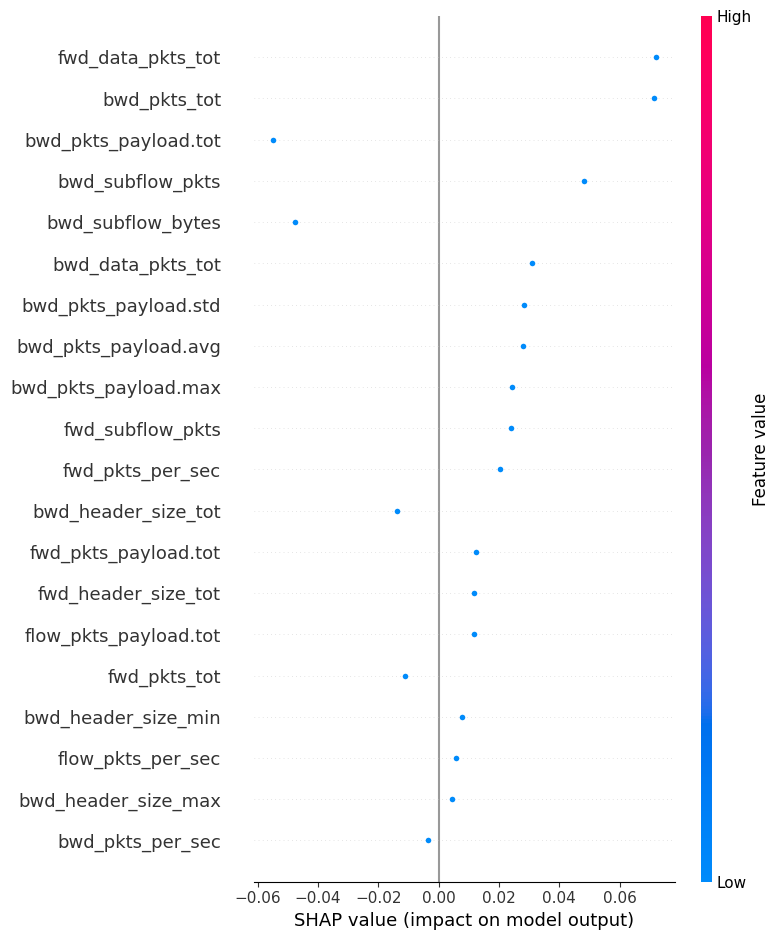

In [21]:
import shap
shap.initjs()

# Create a SHAP Explainer
explainer_shap = shap.Explainer(model, X_test_labeled, feature_names=feature_names)

# Explain the prediction for a specific instance
shap_values = explainer_shap.shap_values(X_test_labeled[weird_idx:weird_idx+1])

# Display SHAP summary plot
shap.summary_plot(shap_values, features=X_test_labeled[weird_idx:weird_idx+1], feature_names=feature_names)

In [22]:
print(f"Lime Predicted Class: {class_names[predicted_class_lime]}")
print(f"SHAP Predicted Class: {'Malicious' if np.sum(shap_values) > 0 else 'Normal'}")
print(f"True Class: {y_test_target_series[weird_idx]}")

Lime Predicted Class: Normal
SHAP Predicted Class: Malicious
True Class: 1


### Notes:

- **Algorithm Differences:** SHAP and LIME use different algorithms. These differences can lead to variations in the explanations.
- **Assumptions and Constraints:** SHAP assumes that features interact in a certain way, whereas LIME assumes that the model is locally linear and can be well-approximated by a simpler model. If these assumptions are not met, explanations may differ.
- **Sampling Variability:** LIME relies on perturbing the input data and fitting a local model on the perturbed samples. The randomness in the sampling process can lead to variations in the explanations. On the other hand, SHAP provides a unique solution based on the Shapley values, but the approximation methods used can introduce variability.
- **Hyperparameter Choices:** Hyperparameter choices can influence the performance of both SHAP and LIME. If different hyperparameters are used for each method, it could contribute to variations in the explanations.
- **Model Complexity:** If the model is highly non-linear or has complex interactions between features, different explanation methods may interpret it in various ways.